<a href="https://colab.research.google.com/github/LeraDoroshenko/mn/blob/main/%D0%BB%D0%B0%D0%B12_1_%D0%94%D0%BE%D1%80%D0%BE%D1%88%D0%B5%D0%BD%D0%BA%D0%BE_%D0%92_4_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Завдання 1.
Зчитати датасет ВВП (млн. дол. США) за країнами з Вікіпедії за
посиланням
https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)**

In [111]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from io import StringIO

url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

tables = soup.find_all('table', class_='wikitable')
gdp_table = str(tables[0])

df = pd.read_html(StringIO(gdp_table))[0]

**1. Вивести перших 5 рядків.**

In [112]:
print(df.head())

  Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022  


**2. Визначити розмір датасета.**

In [113]:
print(df.shape)

(210, 7)


**3. Визначити оптимальну кількість стовпців.**

In [114]:
df = df.iloc[:, :4]

**4. Змінити назви стовпців на більш зручні**

In [115]:
df.columns = ['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022']

**5. Визначити тип даних.**

In [116]:
print(df.dtypes)


Country           object
MVF_2024          object
WorldBank_2023    object
OON_2022          object
dtype: object


**6. Замініть у таблиці значення "—" на значення NaN. Перевірити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення.**
**7. Ще раз перевірити наявність пропущених значень.**

In [117]:
df.replace('—', pd.NA, inplace=True)
print(df.isna().sum())


Country            0
MVF_2024          15
WorldBank_2023    15
OON_2022           8
dtype: int64


In [119]:
print(df.isnull().sum())

Country            0
MVF_2024          15
WorldBank_2023    15
OON_2022           8
dtype: int64


In [120]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [121]:
print(df.isnull().sum())

Country            0
MVF_2024          15
WorldBank_2023    15
OON_2022           8
dtype: int64


**8. Перевірити наявність дублікатів. При наявності видалити дублікати.**

In [122]:
duplicates = df.duplicated().sum()
print("Кількість дублікатів:", duplicates)
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Дублікати видалено.")

Кількість дублікатів: 0


**9. Вивести описову статистику датасету describe()**

In [123]:
print(df.describe())


       Country   MVF_2024 WorldBank_2023   OON_2022
count      210        195            195        202
unique     210        195             12        202
top      World  109529216           2024  105435540
freq         1          1            182          1


**10.Визначте відхилення (різницю) між показниками MVF_2024 та WorldBank_2023 для кожної країни.**

In [124]:
for column in ['MVF_2024', 'WorldBank_2023', 'OON_2022']:
    df[column] = pd.to_numeric(df[column].replace('[$,]', '', regex=True), errors='coerce')
df['Difference_MVF_WB'] = df['MVF_2024'] - df['WorldBank_2023']
max_diff_country = df.loc[df['Difference_MVF_WB'].abs().idxmax()]
print("Країна з найбільшим відхиленням між MVF_2024 та WorldBank_2023:\n", max_diff_country)

Країна з найбільшим відхиленням між MVF_2024 та WorldBank_2023:
 Country                    World
MVF_2024             109529216.0
WorldBank_2023            2024.0
OON_2022             105435540.0
Difference_MVF_WB    109527192.0
Name: 0, dtype: object


**11.Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та
OON_2022.**

In [125]:
correlation_matrix = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].corr()
print(correlation_matrix)


                MVF_2024  WorldBank_2023  OON_2022
MVF_2024        1.000000        0.017199  0.999987
WorldBank_2023  0.017199        1.000000  0.017384
OON_2022        0.999987        0.017384  1.000000


**12.Обчисліть середнє значення для кожного стовпця (MVF_2024, WorldBank_2023, OON_2022).**

In [126]:
mean_values = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()
print(mean_values)

MVF_2024          1.123228e+06
WorldBank_2023    2.023962e+03
OON_2022          1.037206e+06
dtype: float64


**13.Обчисліть стандартне відхилення показників для кожної країни.**

In [127]:
df['STD_Deviation'] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)
max_std_country = df.loc[df['STD_Deviation'].idxmax()]
print("Країна з найвищою варіативністю:\n", max_std_country)

Країна з найвищою варіативністю:
 Country                        World
MVF_2024                 109529216.0
WorldBank_2023                2024.0
OON_2022                 105435540.0
Difference_MVF_WB        109527192.0
STD_Deviation        62087559.498287
Name: 0, dtype: object


**14.Визначення країни з найвищим та найнижчим показниками: Знайдіть країну з найвищим та найнижчим показниками у кожному з років (MVF_2024, WorldBank_2023, OON_2022).**

In [128]:
max_mvf_country = df.loc[df['MVF_2024'].idxmax()]
min_mvf_country = df.loc[df['MVF_2024'].idxmin()]
print("Країна з найвищим MVF_2024:\n", max_mvf_country)
print("Країна з найнижчим MVF_2024:\n", min_mvf_country)

Країна з найвищим MVF_2024:
 Country                        World
MVF_2024                 109529216.0
WorldBank_2023                2024.0
OON_2022                 105435540.0
Difference_MVF_WB        109527192.0
STD_Deviation        62087559.498287
Name: 0, dtype: object
Країна з найнижчим MVF_2024:
 Country                   Tuvalu
MVF_2024                    66.0
WorldBank_2023            2024.0
OON_2022                    62.0
Difference_MVF_WB        -1958.0
STD_Deviation        1131.608295
Name: 209, dtype: object


**15.Побудуйте гістограму для розподілу показників MVF_2024 серед всіх країн.**


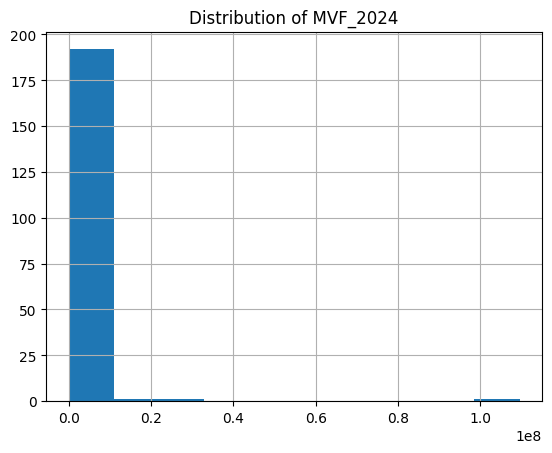

In [129]:
df['MVF_2024'].hist()
plt.title('Distribution of MVF_2024')
plt.show()

**16.Розрахуйте частку кожної країни в загальному значенні для кожного року (MVF_2024, WorldBank_2023, OON_2022).**


In [131]:
df['Share_MVF_2024'] = df['MVF_2024'] / df['MVF_2024'].sum()
df['Share_WorldBank_2023'] = df['WorldBank_2023'] / df['WorldBank_2023'].sum()
df['Share_OON_2022'] = df['OON_2022'] / df['OON_2022'].sum()
print(df[['Country', 'Share_MVF_2024', 'Share_WorldBank_2023', 'Share_OON_2022']])

              Country  Share_MVF_2024  Share_WorldBank_2023  Share_OON_2022
0               World    5.000663e-01              0.005376    5.032347e-01
1       United States    1.314028e-01              0.005376    1.305914e-01
2               China    8.461254e-02                   NaN    8.493295e-02
3             Germany    2.096111e-02              0.005376    2.126849e-02
4               Japan    1.876667e-02              0.005376    2.010802e-02
..                ...             ...                   ...             ...
205          Kiribati    1.419901e-06              0.005376    1.331643e-06
206             Palau    1.406204e-06              0.005376    1.255276e-06
207  Marshall Islands    1.392507e-06              0.005376    1.355507e-06
208             Nauru    7.350611e-07              0.005376    7.350286e-07
209            Tuvalu    3.013294e-07              0.005376    2.959206e-07

[210 rows x 4 columns]


**17.Візуалізуйте зміни в показниках для кожної країни за три роки на графіку.**


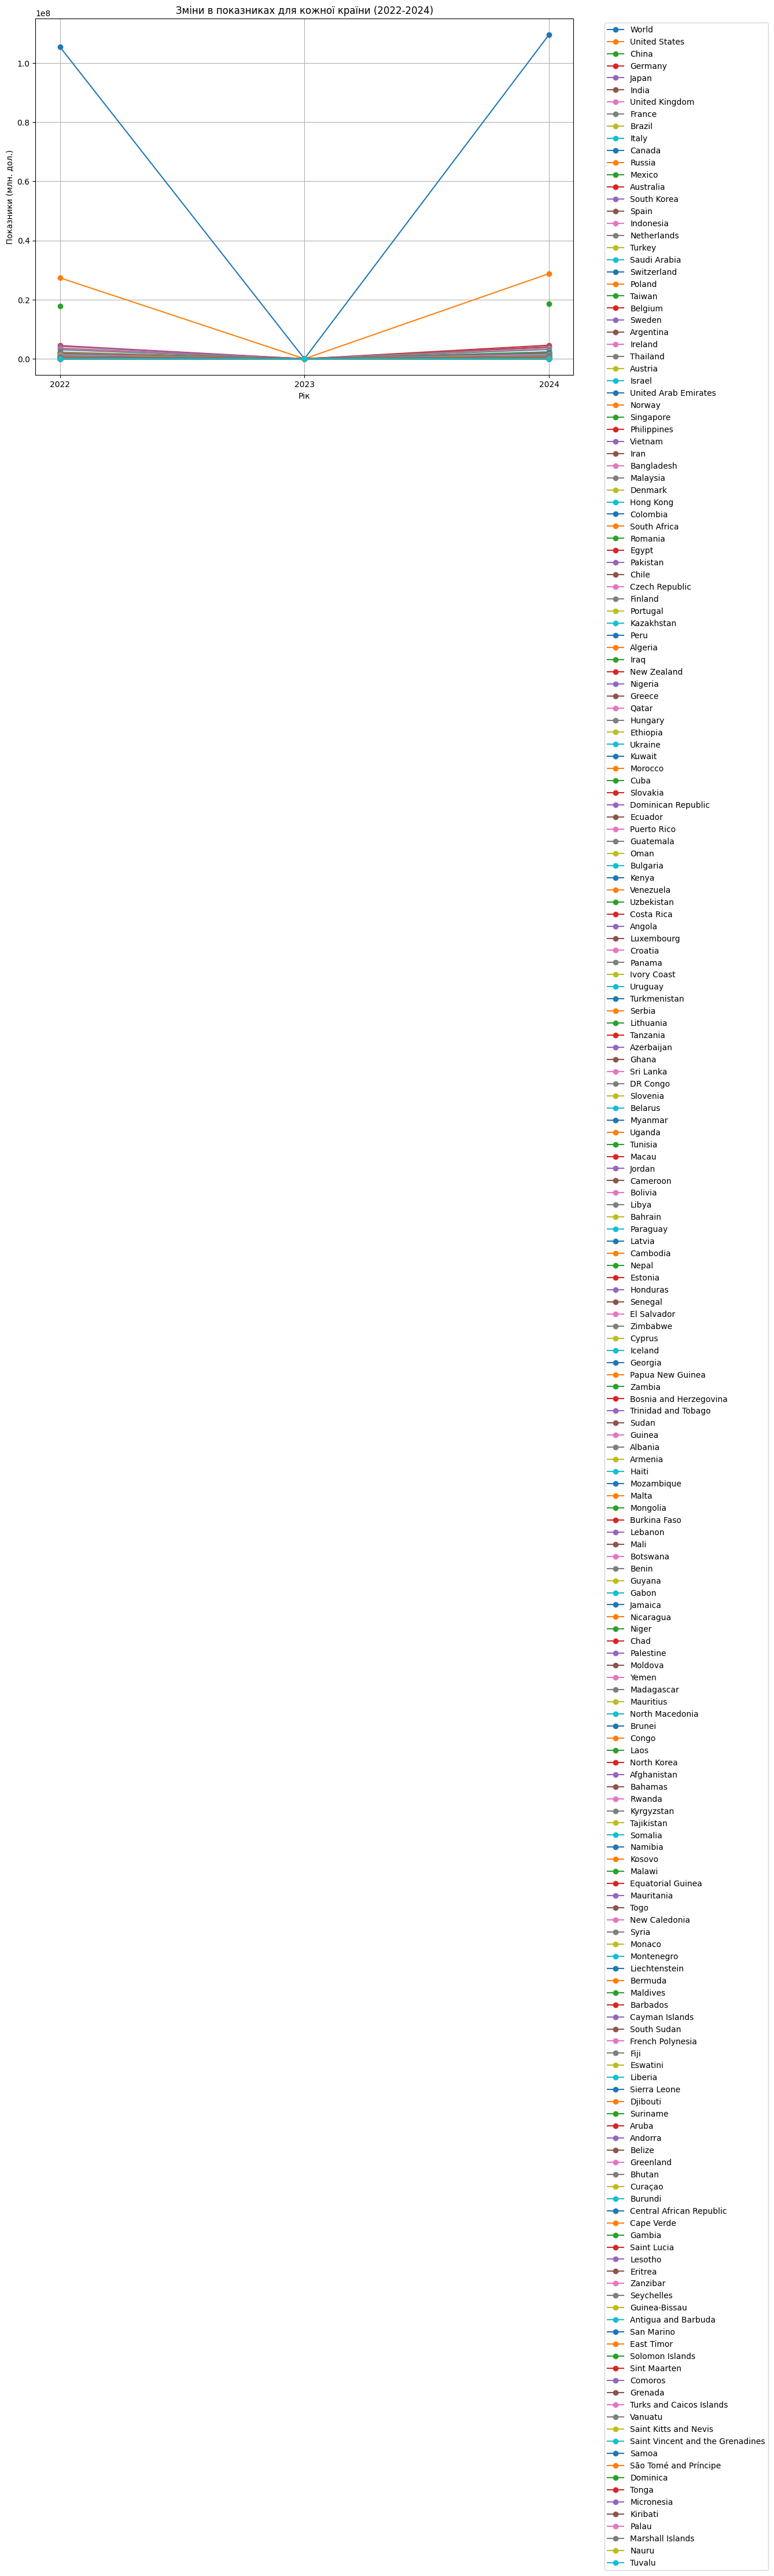

In [132]:
plt.figure(figsize=(12, 8))
for i, row in df.iterrows():
    plt.plot(['2022', '2023', '2024'], [row['OON_2022'], row['WorldBank_2023'], row['MVF_2024']], marker='o', label=row['Country'])

plt.title('Зміни в показниках для кожної країни (2022-2024)')
plt.xlabel('Рік')
plt.ylabel('Показники (млн. дол.)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**Висновок**
Було проведено комплексний аналіз даних по ВВП країн. Виявлено різноманітні відхилення, обчислено кореляції та візуалізовано результати аналізу.
Завдяки даному завданню можна зрозуміти як змінювалось ВВП різних країн, а також оцінити зміни економічних показників під впливом різних факторів.